Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.drop(['Unnamed: 0'], axis=1, inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# KMEANS

In [ ]:
# Normalize heterogenous numerical data

In [5]:
crime_kmnorm = pd.DataFrame(normalize(crime), columns=crime.columns)
crime_kmnorm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [ ]:
# within-cluster sum-of-squares criterion

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(crime_kmnorm)
    wcss.append(kmeans.inertia_)

In [ ]:
# Plot K values ranges vs wcss to get Elbow graph for choosing K (no. of clusters)

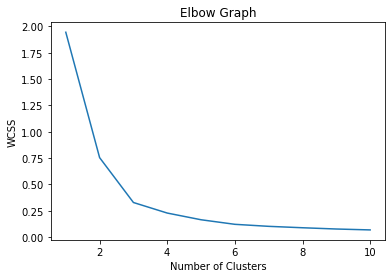

In [7]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Build Cluster algorithm using K = 4

In [ ]:
# Cluster algorithm using K = 4

In [8]:
kcluster = KMeans(4, random_state=30).fit(crime_kmnorm)
kcluster

KMeans(n_clusters=4, random_state=30)

In [9]:
kcluster.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3])

In [ ]:
# Assign clusters to the dataset

In [10]:
crimeKM = crime.copy()
crimeKM['cluster_km'] = kcluster.labels_
crimeKM

,Murder,Assault,UrbanPop,Rape,cluster_km
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [ ]:
# Compute the centroid for K = 4 clusters with 11 variables

In [11]:
kcluster.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689]])

In [12]:
crimeKM.groupby('cluster_km').agg(['mean']).reset_index()

,cluster_km,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545
1,1,12.021053,260.526316,66.421053,27.694737
2,2,2.616667,54.833333,62.000000,12.333333
3,3,6.542857,145.285714,63.500000,20.107143


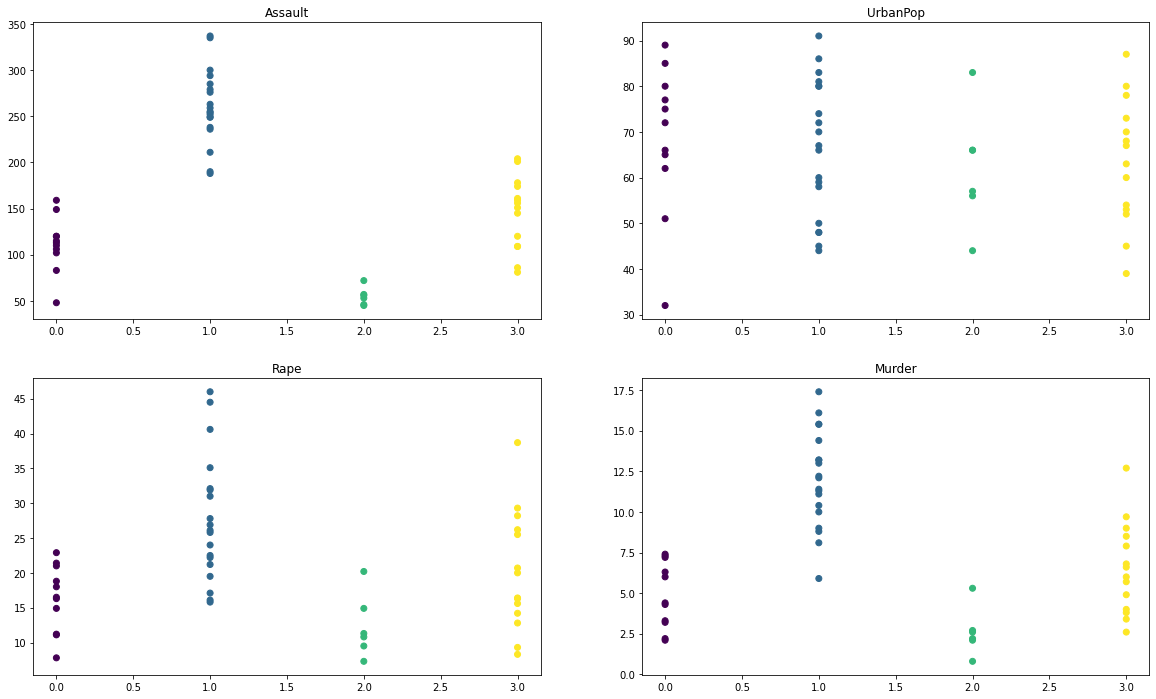

In [13]:
plt.subplots(figsize = (20,12))
plt.subplot(221)
plt.scatter(crimeKM['cluster_km'], crimeKM['Assault'], c=kcluster.labels_)
plt.title('Assault')
plt.subplot(222)
plt.scatter(crimeKM['cluster_km'], crimeKM['UrbanPop'], c=kcluster.labels_)
plt.title('UrbanPop')
plt.subplot(223)
plt.scatter(crimeKM['cluster_km'], crimeKM['Rape'], c=kcluster.labels_)
plt.title('Rape')
plt.subplot(224)
plt.scatter(crimeKM['cluster_km'], crimeKM['Murder'], c=kcluster.labels_)
plt.title('Murder')
plt.show()


# Build cluster algorithm using K = 5

In [14]:
kcluster1 = KMeans(5, random_state=30).fit(crime_kmnorm)
kcluster1

KMeans(n_clusters=5, random_state=30)

In [15]:
kcluster1.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 4, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3])

In [ ]:
# Assign clusters to dataset 

In [16]:
crimeKM1 = crime.copy()
crimeKM1['cluster_km1'] = kcluster1.labels_
crimeKM1

,Murder,Assault,UrbanPop,Rape,cluster_km1
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [17]:
kcluster1.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.0247473 , 0.69224362, 0.70739404, 0.13009016],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277]])

In [18]:
crimeKM1.groupby('cluster_km1').agg(['mean']).reset_index()

,cluster_km1,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545
1,1,12.021053,260.526316,66.421053,27.694737
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.542857,145.285714,63.500000,20.107143
4,4,5.300000,46.000000,83.000000,20.200000


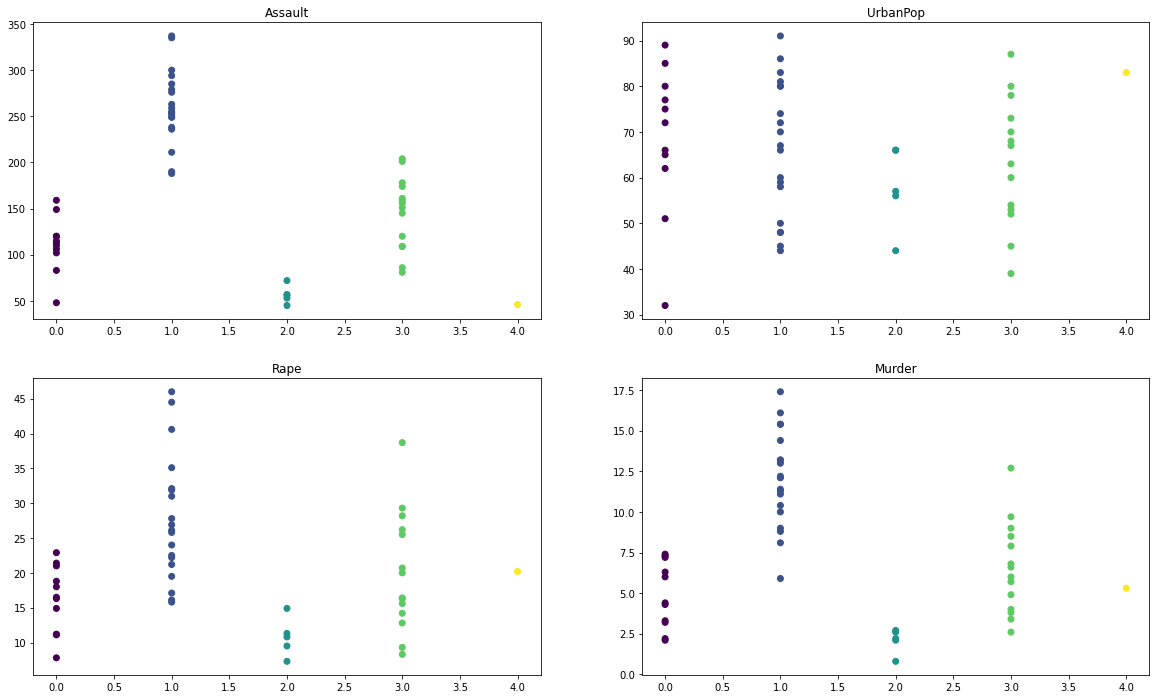

In [19]:
plt.subplots(figsize = (20,12))
plt.subplot(221)
plt.scatter(crimeKM1['cluster_km1'], crimeKM1['Assault'], c=kcluster1.labels_)
plt.title('Assault')
plt.subplot(222)
plt.scatter(crimeKM1['cluster_km1'], crimeKM1['UrbanPop'], c=kcluster1.labels_)
plt.title('UrbanPop')
plt.subplot(223)
plt.scatter(crimeKM1['cluster_km1'], crimeKM1['Rape'], c=kcluster1.labels_)
plt.title('Rape')
plt.subplot(224)
plt.scatter(crimeKM1['cluster_km1'], crimeKM1['Murder'], c=kcluster1.labels_)
plt.title('Murder')
plt.show()

# DBSCAN

In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset

In [20]:
crime_dbnorm = StandardScaler().fit_transform(crime)
crime_dbnorm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
# DBSCAN Clustering

In [21]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(crime_dbnorm)

DBSCAN(eps=1, min_samples=4)

In [22]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [ ]:
# Adding clusters to dataset

In [23]:
crimedb = crime.copy()
crimedb['clusterdb'] = dbscan.labels_
crimedb

,Murder,Assault,UrbanPop,Rape,clusterdb
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [24]:
crime_dbnorm = metrics.silhouette_score(crime_dbnorm, dbscan.labels_)
crime_dbnorm

0.2051154919322

In [25]:
def dbscans(crime_dbnorm, eps, min_samples):
    ss = StandardScaler()
    crime_dbnorm = ss.fit_transform(crime_dbnorm)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(crime_dbnorm)
    y_pred = db.fit_predict(crime_dbnorm)
    plt.scatter(crime_dbnorm[:,0], crime_dbnorm[:,2], c=y_pred, cmap='Paired')
    plt.title('DBSCAN')

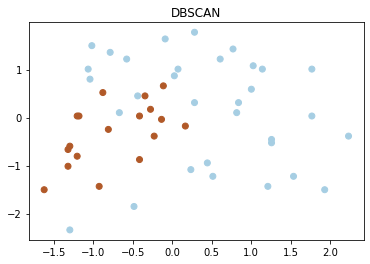

In [26]:
dbscans(crimedb,1,8)

In [27]:
crimedb.groupby('clusterdb').agg(['mean']).reset_index()

,clusterdb,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


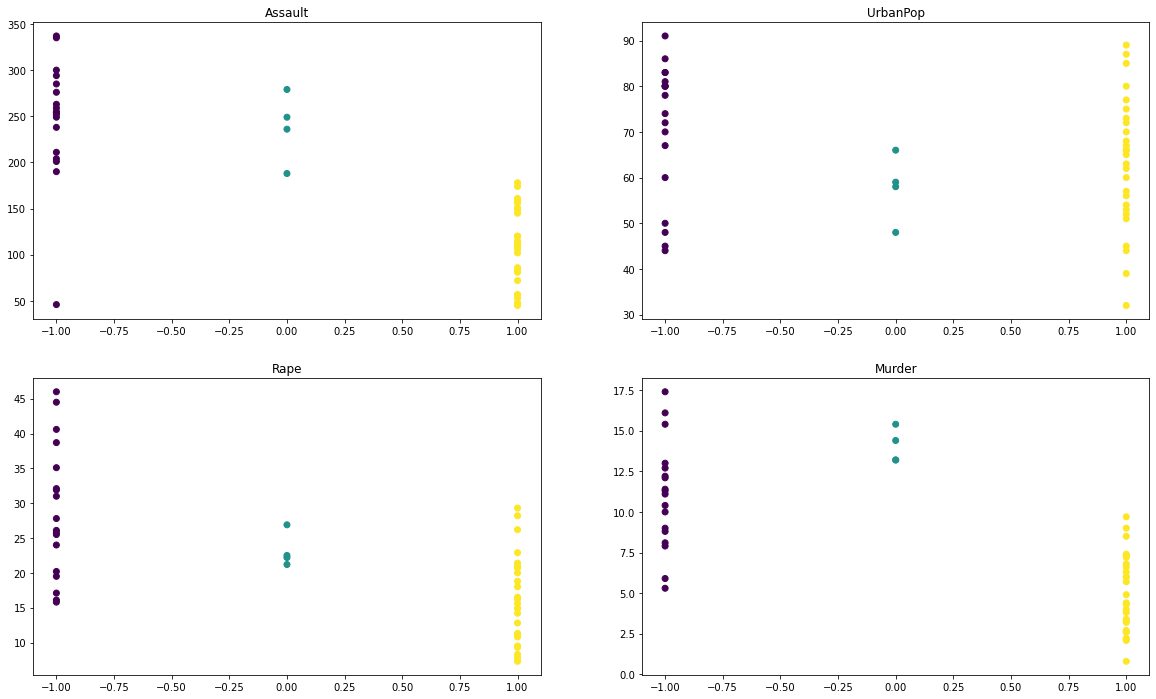

In [28]:
plt.subplots(figsize = (20,12))
plt.subplot(221)
plt.scatter(crimedb['clusterdb'], crimedb['Assault'], c=dbscan.labels_)
plt.title('Assault')
plt.subplot(222)
plt.scatter(crimedb['clusterdb'], crimedb['UrbanPop'], c=dbscan.labels_)
plt.title('UrbanPop')
plt.subplot(223)
plt.scatter(crimedb['clusterdb'], crimedb['Rape'], c=dbscan.labels_)
plt.title('Rape')
plt.subplot(224)
plt.scatter(crimedb['clusterdb'], crimedb['Murder'], c=dbscan.labels_)
plt.title('Murder')
plt.show()

# Hierarchical

In [ ]:
# Normalization Function

In [29]:
def minmax(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

In [ ]:
# Normalization dataframe 

In [30]:
hei_norm = minmax(crime)
hei_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
# Create dendogram

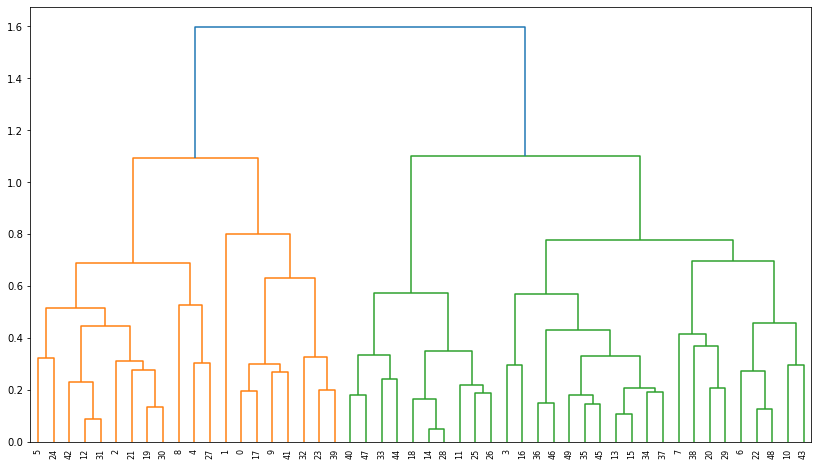

In [31]:
plt.figure(figsize=(14, 8))
dendro = sch.dendrogram(sch.linkage(hei_norm, method='complete'))

In [ ]:
# Create cluster

In [32]:
hei_clust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
hei_clust

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [33]:
y_hei_clust = hei_clust.fit_predict(hei_norm)
y_hei_clust

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [34]:
crimeHK = crime.copy()
crimeHK['cluster_hk'] = y_hei_clust
crimeHK

,Murder,Assault,UrbanPop,Rape,cluster_hk
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [35]:
crimeHK.groupby('cluster_hk').agg(['mean']).reset_index()

,cluster_hk,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


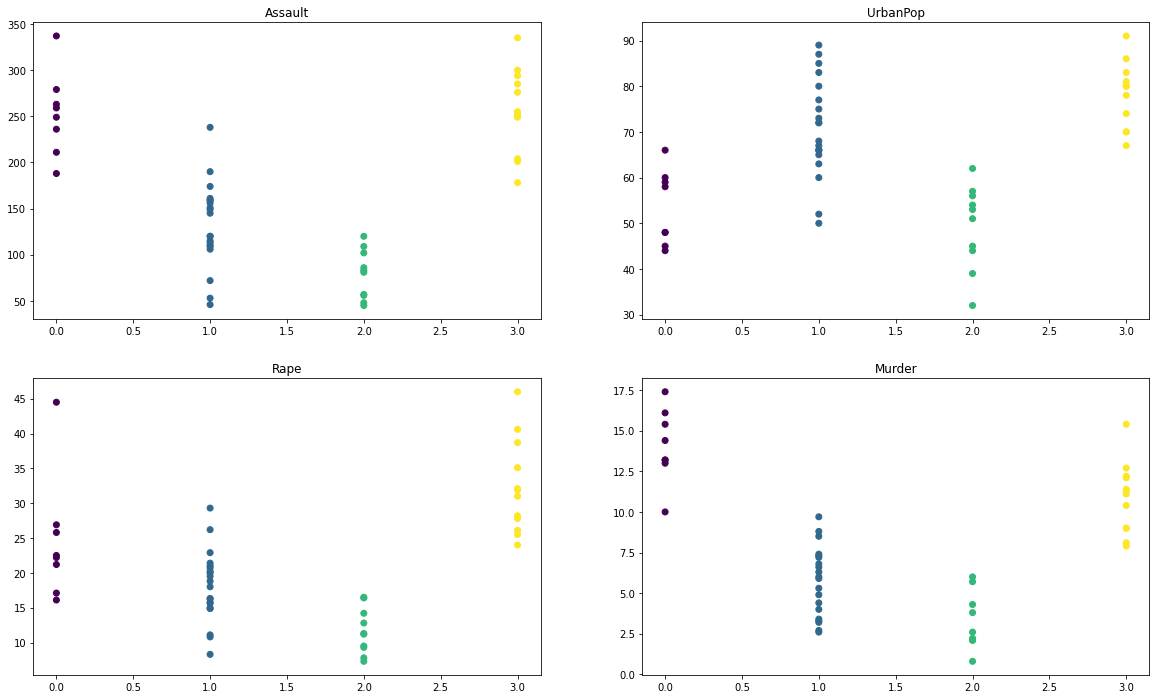

In [36]:
plt.subplots(figsize = (20,12))
plt.subplot(221)
plt.scatter(crimeHK['cluster_hk'], crimeHK['Assault'], c=y_hei_clust)
plt.title('Assault')
plt.subplot(222)
plt.scatter(crimeHK['cluster_hk'], crimeHK['UrbanPop'], c=y_hei_clust)
plt.title('UrbanPop')
plt.subplot(223)
plt.scatter(crimeHK['cluster_hk'], crimeHK['Rape'], c=y_hei_clust)
plt.title('Rape')
plt.subplot(224)
plt.scatter(crimeHK['cluster_hk'], crimeHK['Murder'], c=y_hei_clust)
plt.title('Murder')
plt.show()